# Import necessary libraries

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Process

In [ ]:
samples = [500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 40000, 50000]
features = np.arange(2, 8)
std = [1, 1.4, 1.8, 2, 3, 4, 5, 6, 7]
report = []

for sample in samples:
    for feature in features:
        for st in std:
            t0 = time.time()
            x, y = make_blobs(
                n_samples=sample,
                n_features=feature,
                cluster_std=st,
                random_state=1
            )
            model = LogisticRegression()
            model.fit(x, y)
            predict = model.predict(x)
            score = model.score(x, y) * 100
            t1 = time.time()
            report.append({
                "Sample": sample,
                "feature": feature,
                "Std": st,
                "Time": round(t1-t0, 6),
                "Score": score})


df = pd.DataFrame(report, index=None)
df.to_csv("Report.csv")

# Post Processing

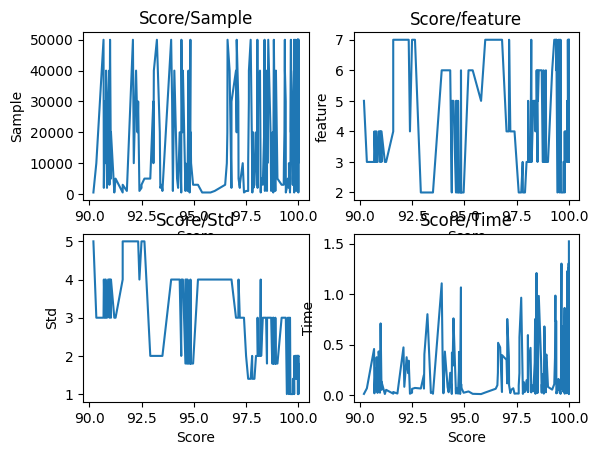

In [5]:
df = pd.read_csv("Report.csv", index_col=0)

features = df.drop(columns=["Score"]).columns
i = 1
for feature in features:
    s_score, s_time = zip(*sorted(zip(df["Score"], df[feature])))
    s_score = np.array(s_score)
    s_time = np.array(s_time)
    s_time = s_time[s_score > 90]
    s_score = s_score[s_score > 90]
    plt.subplot(2, 2, i)
    plt.plot(s_score, s_time)
    plt.xlabel("Score")
    plt.ylabel(feature)
    plt.title(f"Score/{feature}")
    i += 1
plt.show()

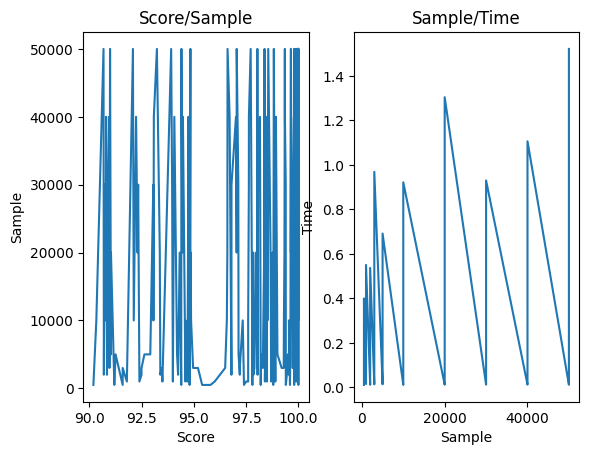

In [7]:
s_score, s_sample = zip(*sorted(zip(df["Score"], df["Sample"])))
s_score = np.array(s_score)
s_sample = np.array(s_sample)
s_sample = s_sample[s_score > 90]
s_score = s_score[s_score > 90]
plt.subplot(1, 2, 1)
plt.plot(s_score, s_sample)
plt.xlabel("Score")
plt.ylabel("Sample")
plt.title("Score/Sample")

s_sample, s_time = zip(*sorted(zip(s_sample, s_time)))
plt.subplot(1, 2, 2)
plt.plot(s_sample, s_time)
plt.xlabel("Sample")
plt.ylabel("Time")
plt.title("Sample/Time")

plt.show()